# The Spark Foundation - Data Science and Business Analytics Internship

# S. Pavithra

## Task - 1
To predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This task involves two variables hours and scores.

## Importing Required Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Reading the Dataset Provided

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
# checking the number of rows and columns in the dataset
data.shape

(25, 2)

In [8]:
# checking for the number of elements in the dataset
data.size

50

In [9]:
# type information of the file
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Checking for the null values in the data

In [3]:
 # to identify the no of missing data
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

Above output shows that the given Dataset contains no null values

## Checking for mean, median, maximum, minimum values of the dataset

In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Plotting the data on graph

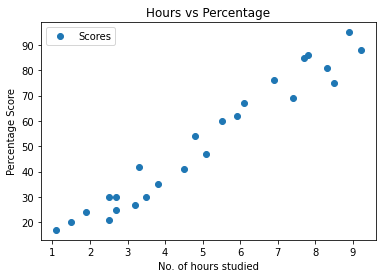

In [51]:
data.plot(x = 'Hours', y = 'Scores', style = 'o')
plt.title('Hours vs Percentage')
plt.xlabel('No. of hours studied')
plt.ylabel('Percentage Score')

plt.show()

The above graph shows that as the number of hours increases the percentage of the each student is also increased.  The plot is positively linear.

## Preparing the data

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [24]:
# accessing rows and columns by index-based
X = data.iloc[:, :-1].values
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [25]:
y= data.iloc[:,1].values
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [26]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [27]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [32]:
regressor.coef_,regressor.intercept_

(array([9.91065648]), 2.018160041434683)

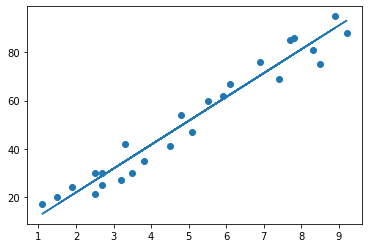

In [28]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [29]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [30]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [36]:
hours = np.array([9.25])
hours_studied = hours.reshape(-1,1)
own_pred = regressor.predict(hours_studied)


In [37]:
print('If a student studied 9.25 hrs/day the score would be:', own_pred[0])

If a student studied 9.25 hrs/day the score would be: 93.69173248737538


### **Evaluating the model**

In [38]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
